In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
import pylab
import seaborn as sns

In [6]:
%load_ext autoreload
%autoreload 2

## Testing price response functions

In [7]:
tsla_df = pd.read_csv('../data/market_orders/TSLA-2016-R1.csv', header=0,index_col=0)
ebay_df = pd.read_csv('../data/market_orders/EBAY-2016-R1.csv', header=0,index_col=0)

In [16]:
from liquidity.response_functions.price_response_functions import compute_conditional_aggregate_impact
from liquidity.response_functions.price_response_functions import compute_price_response

In [17]:

SAMPLE_LAG = 100
ACF_RANGE = 1001
tsla_100 = compute_conditional_aggregate_impact(tsla_df, T=SAMPLE_LAG)
ebay_100 = compute_conditional_aggregate_impact(ebay_df, T=SAMPLE_LAG)

In [18]:
tsla_100.describe()

,event_timestamp,midprice,vol_imbalance,sign_imbalance,sign,daily_R1,daily_vol,daily_num,R100
count,7576,7576.000000,7576.000000,7576.000000,7576.000000,7576.000000,7.576000e+03,7576.000000,7576.000000
mean,2016-06-23 00:30:08.185890304,208.625695,0.000005,-0.000675,-0.040655,0.024219,3.615686e+05,3590.626980,-0.001173
min,2016-01-04 10:30:02.487834868,144.830000,-0.000567,-0.072312,-1.000000,-0.109997,8.077400e+04,962.000000,-19.100000
25%,2016-03-23 14:46:03.794099712,193.805000,-0.000033,-0.006313,-1.000000,0.018343,2.383570e+05,2475.000000,-0.365000
50%,2016-06-14 14:11:20.921004032,207.175000,0.000004,-0.000417,-1.000000,0.023188,3.092610e+05,3171.000000,0.000000
75%,2016-09-30 11:03:42.460367872,223.727500,0.000045,0.005092,1.000000,0.028822,4.393330e+05,4370.000000,0.350000
max,2016-12-30 14:46:27.540027150,267.315000,0.000254,0.030053,1.000000,0.140840,1.134392e+06,9210.000000,12.135000
std,NaN,23.926687,0.000079,0.009934,0.999239,0.020078,1.799494e+05,1582.391274,0.931059


In [19]:
tsla_df_lo = pd.read_csv('../data/limit_orders/TSLA-2016-R1-LO.csv', header=0,index_col=0)

KeyboardInterrupt: 

In [ ]:
tsla_100_lo = compute_conditional_aggregate_impact(tsla_df_lo, T=SAMPLE_LAG)

In [ ]:
tsla_100_lo.describe()

In [ ]:
# MO_LAG_INTERVALS = (5, 10, 20, 50, 100)
MO_LAG_INTERVALS = np.arange(5, 100, 5)

# Test response functions

In [ ]:
tsla_df.head()

In [ ]:
R1 = compute_price_response(tsla_df)
R1.head()

In [ ]:
R1 = compute_price_response(tsla_df, lag=4)
R1.head()

In [14]:
R1 = compute_price_response(tsla_df, lag=4, normalise=True)
R1.head()

,midprice,sign,daily_R1,R4
0,221.410,-1,0.027301,-0.093019
1,221.305,-1,0.027301,-0.093019
2,221.200,1,0.027301,0.004429
3,221.205,1,0.027301,0.017718
4,221.225,1,0.027301,0.000000


#  Fitting process

In [15]:
tsla_df.head()

,event_timestamp,trade_sign,side,lob_action,order_executed,execution_price,execution_size,ask,bid,midprice,ask_volume,bid_volume,price_changing,midprice_change,R1,norm_trade_volume
0,2016-01-04 10:30:02.487834868,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,100.0,100.0,True,0.000,-0.000,0.708122
1,2016-01-04 10:30:02.594369706,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,100.0,100.0,True,0.000,-0.000,0.708122
2,2016-01-04 10:30:02.602151380,-1,BID,REMOVE,True,221.36,100,221.46,221.36,221.410,200.0,100.0,True,-0.095,0.095,0.708122
3,2016-01-04 10:30:02.627167275,-1,BID,REMOVE,True,221.27,25,221.36,221.27,221.315,200.0,25.0,True,-0.010,0.010,0.177031
4,2016-01-04 10:30:02.895123534,-1,BID,REMOVE,True,221.25,100,221.36,221.25,221.305,100.0,100.0,True,-0.090,0.090,0.708122


In [16]:
"""
Approach I: fit scaling form on all data to find exponents and then use them for renormalisation


Approach II: produce series of RN and QN by fitting scaling funtion for different N, then use powerlaw library to fit power law and determine scale factors; finally, fit known scaling form to find exponents and then use them for renormalisation

"""

'\nApproach I: fit scaling form on all data to find exponents and then use them for renormalisation\n\n\nApproach II: produce series of RN and QN by fitting scaling funtion for different N, then use powerlaw library to fit power law and determine scale factors; finally, fit known scaling form to find exponents and then use them for renormalisation\n\n'

## Approach I

In [8]:
from liquidity.response_functions.fitting import compute_scaling_exponents, renormalise

In [9]:
MO_LAG_INTERVALS = [5, 10, 20, 50, 100]
# MO_LAG_INTERVALS = np.arange(5, 100, 5)

In [10]:
popt_tsla, pcov_tsla, fit_func, data_norm = compute_scaling_exponents(tsla_df, MO_LAG_INTERVALS)

In [11]:
popt_tsla

array([6.65865960e-01, 1.14867888e+00, 4.24659569e-01, 2.44499043e+02,
       1.04510183e+05])

In [12]:
popt_tsla

array([6.65865960e-01, 1.14867888e+00, 4.24659569e-01, 2.44499043e+02,
       1.04510183e+05])

In [13]:
from liquidity.util.fitting_util import get_agg_features, bin_data_into_quantiles
binned_data = []

for T in MO_LAG_INTERVALS:
    result = data_norm[data_norm["T"] == T][["vol_imbalance", "T", "R"]]
    binned_data.append(bin_data_into_quantiles(result, q=31))
data_binned = pd.concat(binned_data)

In [14]:
n = 1001
qmax = 0.0005

# T matrix matching with x-axis
T_array = np.array(MO_LAG_INTERVALS)
T_mat = np.transpose(np.tile(T_array, (n, 1)))

# repeat x-axis sample for
q = np.linspace(-qmax, qmax, n)
q_mat = np.tile(q, (len(T_array), 1))

# function to feed in func need to be flatten
q_data = q_mat.flatten()
T_data = T_mat.flatten()
qT_data = np.array( [q_data, T_data] )
qT_data.shape

print(T_mat.shape)
print(q_mat.shape)

(5, 1001)
(5, 1001)


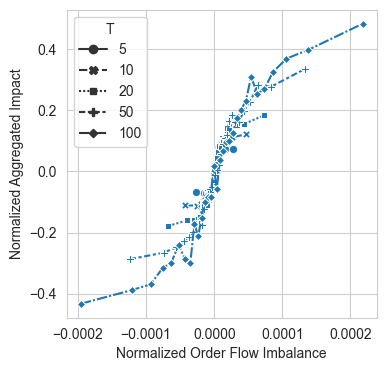

In [18]:
plt.figure(figsize=(4, 4))
ax = sns.lineplot(x='vol_imbalance', y='R', data=data_binned, style="T",
             markers=True, legend='brief')
ax.set(xlabel='Normalized Order Flow Imbalance',
           ylabel='Normalized Aggregated Impact')
# plt.xlim(-0.0005, 0.0005)
# plt.ylim(-0.5, 0.5)
plt.show()

<Axes: xlabel='x_renormalized', ylabel='y_renormalized'>

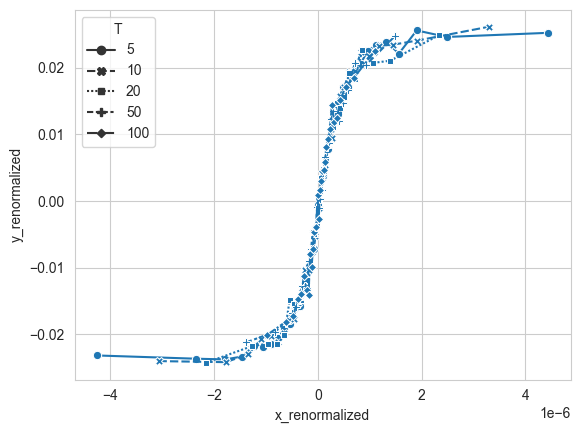

In [21]:
chi, kappa, alpha, beta, gamma = popt_tsla
data_binned['x_renormalized'] = data_binned['vol_imbalance'] / np.power(data_binned['T'], kappa)
data_binned['y_renormalized'] = data_binned['R'] / np.power(data_binned['T'], chi)

sns.lineplot(x='x_renormalized', y='y_renormalized', data=data_binned, style="T",
             markers=True, legend='brief')


In [31]:
data_norm

,event_timestamp,midprice,vol_imbalance,sign_imbalance,sign,daily_R1,daily_vol,daily_num,R,T
0,2016-01-04 10:30:02.487834868,221.410,-5.977935e-06,-0.000832,-1,0.027301,503438,6009,-0.195,5
1,2016-01-04 10:30:24.785387196,221.215,3.396173e-06,0.000499,-1,0.027301,503438,6009,-0.010,5
2,2016-01-04 10:30:39.776241277,221.205,6.132737e-06,0.000832,1,0.027301,503438,6009,0.020,5
3,2016-01-04 10:30:39.777548678,221.225,8.839672e-07,0.000166,1,0.027301,503438,6009,0.000,5
4,2016-01-04 10:30:53.912685027,221.225,1.904166e-06,0.000499,-1,0.027301,503438,6009,0.010,5
...,...,...,...,...,...,...,...,...,...,...
7571,2016-12-30 14:01:37.565364583,212.100,5.134751e-06,0.011981,1,0.019189,219620,2504,0.300,100
7572,2016-12-30 14:12:02.961828752,212.400,6.712785e-05,0.016773,1,0.019189,219620,2504,0.360,100
7573,2016-12-30 14:30:36.797804682,212.760,6.228892e-05,0.020767,1,0.019189,219620,2504,0.605,100
7574,2016-12-30 14:35:58.265269403,213.365,-2.854389e-04,-0.011182,1,0.019189,219620,2504,-0.840,100


In [33]:
renor_results = renormalise(data_norm, popt_tsla, MO_LAG_INTERVALS)

Optimal parameters not found: The maximum number of function evaluations is exceeded
re-trying
Optimal parameters not found: The maximum number of function evaluations is exceeded
Failed to fit for lag 5


/Users/ana_bugaenko/workspace/another_workspace/liquidity/liquidity/response_functions/fitting.py:21: RuntimeWarning: overflow encountered in power
  return x / (1 + abs(x) ** alpha) ** (beta / alpha)
/Users/ana_bugaenko/workspace/another_workspace/liquidity/liquidity/response_functions/fitting.py:21: RuntimeWarning: overflow encountered in power
  return x / (1 + abs(x) ** alpha) ** (beta / alpha)
/Users/ana_bugaenko/workspace/another_workspace/liquidity/liquidity/response_functions/fitting.py:21: RuntimeWarning: overflow encountered in power
  return x / (1 + abs(x) ** alpha) ** (beta / alpha)


In [34]:
renor_results

{10: <liquidity.response_functions.fitting.FitResult at 0x7fbc29360c10>,
 20: <liquidity.response_functions.fitting.FitResult at 0x7fbc80dfc940>,
 50: <liquidity.response_functions.fitting.FitResult at 0x7fbc80dfcf70>,
 100: <liquidity.response_functions.fitting.FitResult at 0x7fbcb4e7b550>,
 150: <liquidity.response_functions.fitting.FitResult at 0x7fbcc16192b0>,
 200: <liquidity.response_functions.fitting.FitResult at 0x7fbcb4e97400>}

In [ ]:
fit_param

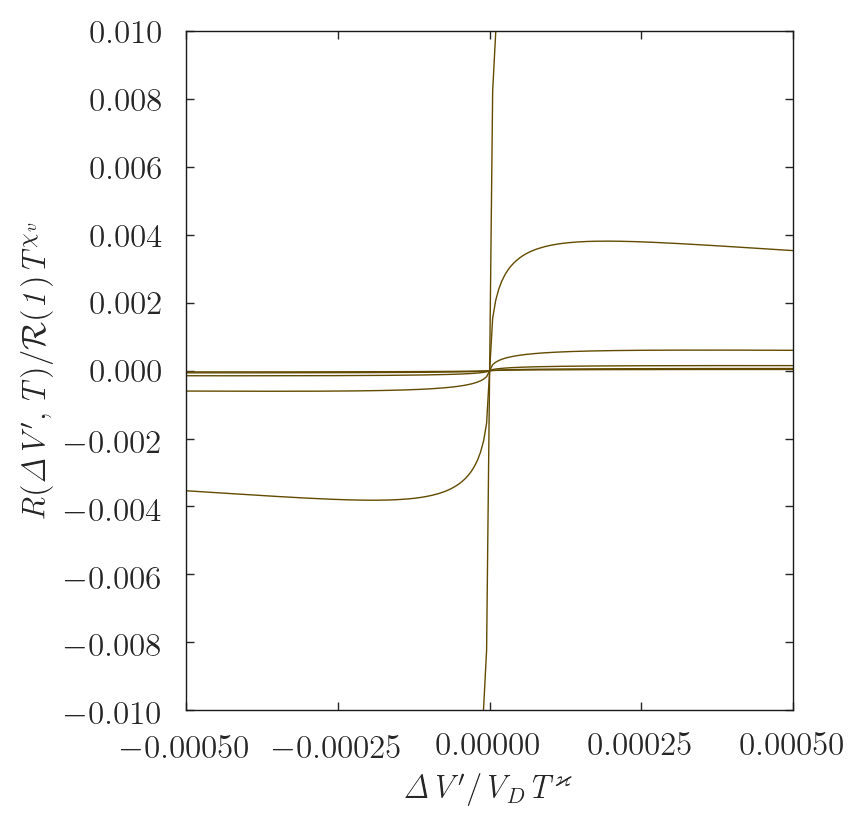

In [38]:
from liquidity.util.plotting.plot_aggrate_impact import plot_collapsed_fitted_func

fit_param = {T: fit_result.params for T, fit_result in renor_results.items()}
plot_collapsed_fitted_func(fit_param, line_color="#624B00", markers_color="#FCC400",
                           xlim=0.0005, ylim=0.01,
                           durations=MO_LAG_INTERVALS)

## Assess goodness of fit

In [ ]:
"""
1. For observations at each T assess how good the master curve fits the data.
2. Take aggregate (mean/max) of MSE - choose outlier resilient methodand Nonlinearity

"""

### Compute residuals for each T

In [39]:
from liquidity.util.fitting_util import bin_data_into_quantiles
from liquidity.response_functions.fitting import scaling_form

residual_dict = {}
for T in MO_LAG_INTERVALS:
    if T not in fit_param.keys():
        continue
    data = data_norm[data_norm['T'] == T]

    binned_data = bin_data_into_quantiles(data)
    x_values = binned_data[['vol_imbalance', 'T']].values.T
    y_values = binned_data['R'].values

    params = fit_param[T][0]
    fitted_values = scaling_form(x_values, *params)
    residuals = y_values - fitted_values
    residual_dict[T] = residuals

/Users/ana_bugaenko/workspace/another_workspace/liquidity/liquidity/util/fitting_util.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x_bin"] = binned_x
/Users/ana_bugaenko/workspace/another_workspace/liquidity/liquidity/util/fitting_util.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["x_bin"] = binned_x
/Users/ana_bugaenko/workspace/another_workspace/liquidity/liquidity/util/fitting_util.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [40]:
residual_dict.keys()

dict_keys([10, 20, 50, 100, 150, 200])

In [41]:
from liquidity.util.goodness_of_fit import compute_rsquared
for T in residual_dict.keys():
    r2, ar2 = compute_rsquared(residual_dict[T], data_norm[data_norm['T'] == T]['R'].values, fit_param[T][0])
    print(f"For T={T} \n R2 = {r2}, \n Adj R2 = {ar2} \n \n")

For T=10 
 R2 = 0.9999911882417589, 
 Adj R2 = 0.9999911877764822 
 

For T=20 
 R2 = 0.9999662659640162, 
 Adj R2 = 0.9999662624013457 
 

For T=50 
 R2 = 0.9995380179534675, 
 Adj R2 = 0.9995378959538513 
 

For T=100 
 R2 = 0.9989772672418619, 
 Adj R2 = 0.9989767268996307 
 

For T=150 
 R2 = 0.9984990649655742, 
 Adj R2 = 0.9984978751637237 
 

For T=200 
 R2 = 0.9978397090923522, 
 Adj R2 = 0.9978374248830922 
 

